In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
np.random.seed(42)

In [ ]:
apartments=[f"Apt_{i}" for i in range(1,21)]

In [ ]:
dates=pd.date_range(start="2025-07-01",periods=31,freq="D")

In [ ]:
data={
    "date":np.tile(dates,len(apartments)),
    "apartment":np.repeat(apartments,len(dates)),
    "electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
}

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df["electricity_usage"]=df["electricity_usage"].round(2)

In [ ]:
print(df.isnull().sum())

date                 0
apartment            0
electricity_usage    0
dtype: int64


In [ ]:
print(df.describe())

                      date  electricity_usage
count                  620         620.000000
mean   2025-07-16 00:00:00          19.982419
min    2025-07-01 00:00:00           3.790000
25%    2025-07-08 00:00:00          16.530000
50%    2025-07-16 00:00:00          20.100000
75%    2025-07-24 00:00:00          23.142500
max    2025-07-31 00:00:00          39.260000
std                    NaN           4.882005


In [ ]:
print(df.dtypes)

date                 datetime64[ns]
apartment                    object
electricity_usage           float64
dtype: object


In [ ]:
age_per_apartment=df.groupby("apartment")["electricity_usage"].sum().sort_values(ascending=False)
#print(usage_per_apartment)

In [ ]:
daily_avg=df.groupby("date")["electricity_usage"].mean()
print(daily_avg.head())

date
2025-07-01    20.9395
2025-07-02    21.1345
2025-07-03    20.1435
2025-07-04    20.9875
2025-07-05    19.6300
Name: electricity_usage, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

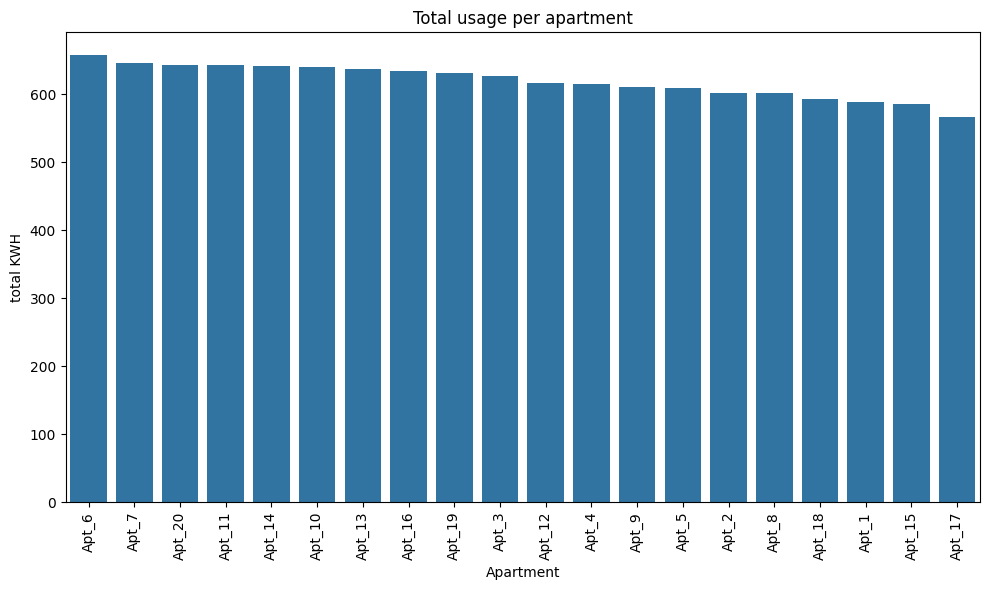

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index,y=usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per apartment")
plt.xlabel("Apartment")
plt.ylabel("total KWH")
plt.tight_layout()
plt.show()

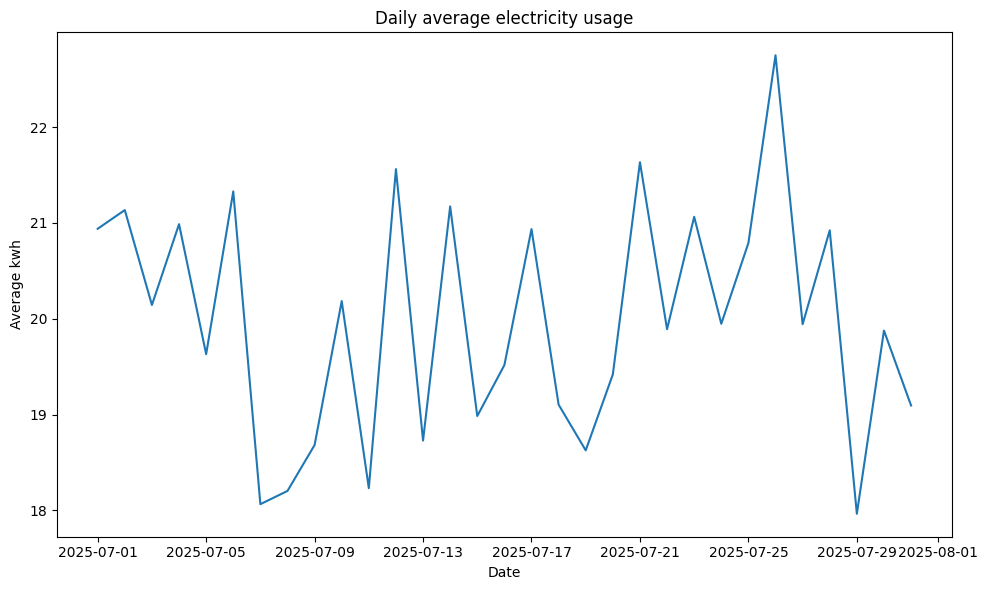

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.title("Daily average electricity usage")
plt.xlabel("Date")
plt.ylabel("Average kwh")
plt.tight_layout()
plt.show()


In [ ]:
threshold=df["electricity_usage"].mean()+2*df["electricity_usage"].std()
df["high_usage_flag"]=df["electricity_usage"]> threshold
print(df[df["high_usage_flag"]==True].head())

          date apartment  electricity_usage  high_usage_flag
113 2025-07-21     Apt_4              32.32             True
125 2025-07-02     Apt_5              30.95             True
179 2025-07-25     Apt_6              33.60             True
209 2025-07-24     Apt_7              39.26             True
220 2025-07-04     Apt_8              31.57             True
